<a href="https://colab.research.google.com/github/tososomaru/ml/blob/master/dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Классификатор пород собак

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import*
from fastai.metrics import error_rate

In [ ]:
bs = 32

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Создание датасета из Гугл Картинок



```
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-scr')?el.getAttribute('data-scr'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('/n')));
```



В консоли браузера выполнить код на странице с классом для загрузки csv с url картинок:
```
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-scr')?el.getAttribute('data-scr'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('/n')));
```
Если на выходе нет csv файла с url, то выполнить этот код:


```
var urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
var hiddenElement = document.createElement('a');
hiddenElement.href = 'data:text/csv;charset=utf-8,' + encodeURI(urls.join('\n'));
hiddenElement.target = '_blank';
hiddenElement.download = 'myFile.csv';
hiddenElement.click();
```

Структура:

```
dogs -->
........american_buldog -->
        ...................american_buldog.csv
........fox_terrier ------>
        ...................fox_terrier.csv
........basset_hound ----->
        ...................basset_hound.csv
```



##Загрузка изображений

In [ ]:
classes = ['american_bulldog', 'basset_hound', 'fox_terrier',
           'affenpinscher', 'afghan_hound', 'akita', 'american_eskimo',
           'american_english_coonhound', 'american_foxhound', 'basenji',
           'bearded_collie', 'belgian_tervuren', 'boston_terrier', 'bulldog',
           'bull_terrier', 'chinese_crested', 'collie', 'dalmatian', 'eurasier',
           'german_shepherd', 'hokkaido']

path = '/content/drive/My Drive/ml/dogs/'


In [ ]:
for с in classes:
  download_images(path + с + "/" + с + '.csv', path + с, max_pics = 200)

##Верификация изображений

In [ ]:
for c in classes:
  verify_images(path+'c', delete=True, max_size=500)

##Просмотр данных

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4
                                  ).normalize(imagenet_stats)

In [ ]:
data.classes

['affenpinscher',
 'afghan_hound',
 'akita',
 'american_bulldog',
 'american_english_coonhound',
 'american_eskimo',
 'american_foxhound',
 'basenji',
 'basset_hound',
 'bearded_collie',
 'belgian_tervuren',
 'boston_terrier',
 'bull_terrier',
 'bulldog',
 'chinese_crested',
 'collie',
 'dalmatian',
 'eurasier',
 'fox_terrier',
 'german_shepherd',
 'hokkaido']

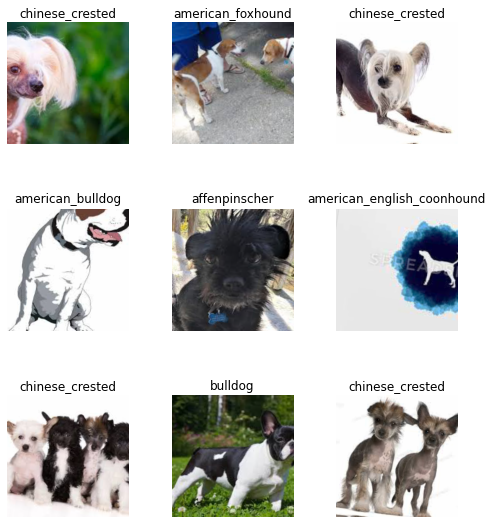

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds),len(data.valid_ds)

(['affenpinscher',
  'afghan_hound',
  'akita',
  'american_bulldog',
  'american_english_coonhound',
  'american_eskimo',
  'american_foxhound',
  'basenji',
  'basset_hound',
  'bearded_collie',
  'belgian_tervuren',
  'boston_terrier',
  'bull_terrier',
  'bulldog',
  'chinese_crested',
  'collie',
  'dalmatian',
  'eurasier',
  'fox_terrier',
  'german_shepherd',
  'hokkaido'],
 21,
 3360,
 840)

##Обучение модели (resnet34)

In [ ]:
learn = cnn_learner(data,models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.791233,0.575485,0.183333,00:51
1,1.024347,0.519794,0.173810,00:51
2,0.713546,0.487662,0.152381,00:51


In [ ]:
learn.save('dogs__resnet34')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

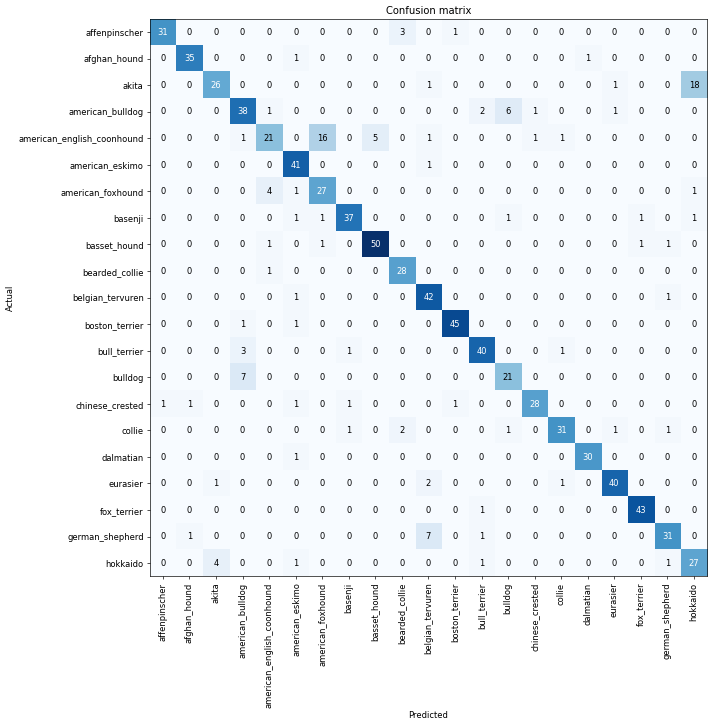

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

##Размораживание, тонкая настройка и скорость обучения

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.960598,0.688859,0.210714,00:55


In [ ]:
learn.load('dogs__resnet34')

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


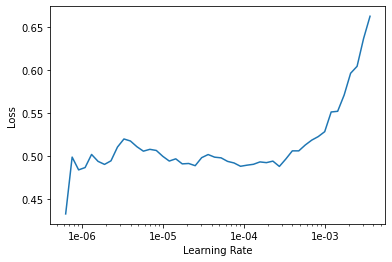

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze
learn.fit_one_cycle(2, max_lr=slice(1e-05,1e-035))

epoch,train_loss,valid_loss,error_rate,time
0,0.482671,0.487627,0.154762,00:53
1,0.476568,0.483378,0.155952,00:54


##Обучение модели (resnet50)

In [ ]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224
                                  ).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


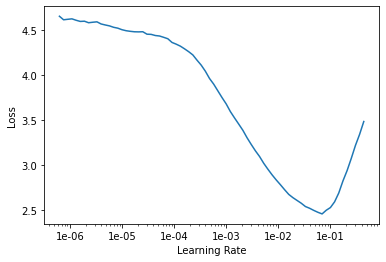

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.371822,0.604806,0.165476,01:03
1,0.883951,0.593115,0.178571,01:02
2,0.644636,0.535343,0.155952,01:02
3,0.480302,0.486869,0.150000,01:02
4,0.368591,0.488480,0.152381,01:02


In [ ]:
learn.save('dogs__resnet50')

In [ ]:
learn.fit_one_cycle(2,max_lr=slice(1e-06,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.297916,0.482416,0.153571,01:02
1,0.284314,0.484065,0.158333,01:04


##Обучение модели (resnet101)

In [ ]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224
                                  ).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet101, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


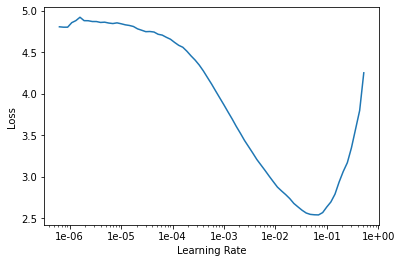

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.392791,0.513664,0.128571,01:31
1,0.885626,0.422005,0.125000,01:30
2,0.611264,0.438843,0.134524,01:30
3,0.442037,0.385467,0.115476,01:30
4,0.326628,0.381508,0.116667,01:30


In [ ]:
learn.save('dogs__resnet101')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-06,1e-045))

epoch,train_loss,valid_loss,error_rate,time
0,0.251949,0.374570,0.116667,02:01
1,0.260078,0.380714,0.115476,01:59


##Обучение модели (resnet152)

In [ ]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(),bs=bs, size=224,
                                  ).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet152, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(5)
learn.save('dogs__resnet152')

epoch,train_loss,valid_loss,error_rate,time
0,1.114592,0.556632,0.171429,02:19
1,0.770393,0.490729,0.145238,02:16
2,0.564779,0.380018,0.121429,02:16
3,0.424378,0.380679,0.121429,02:16
4,0.325904,0.360728,0.113095,02:17


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


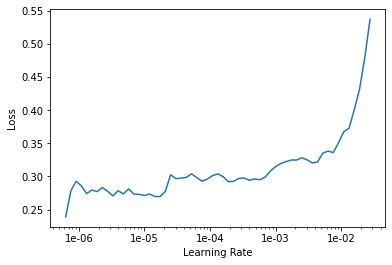

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-06,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.377747,0.483399,0.144048,03:04
1,0.331016,0.381883,0.111905,03:04


In [ ]:
learn.load('dogs__resnet152')

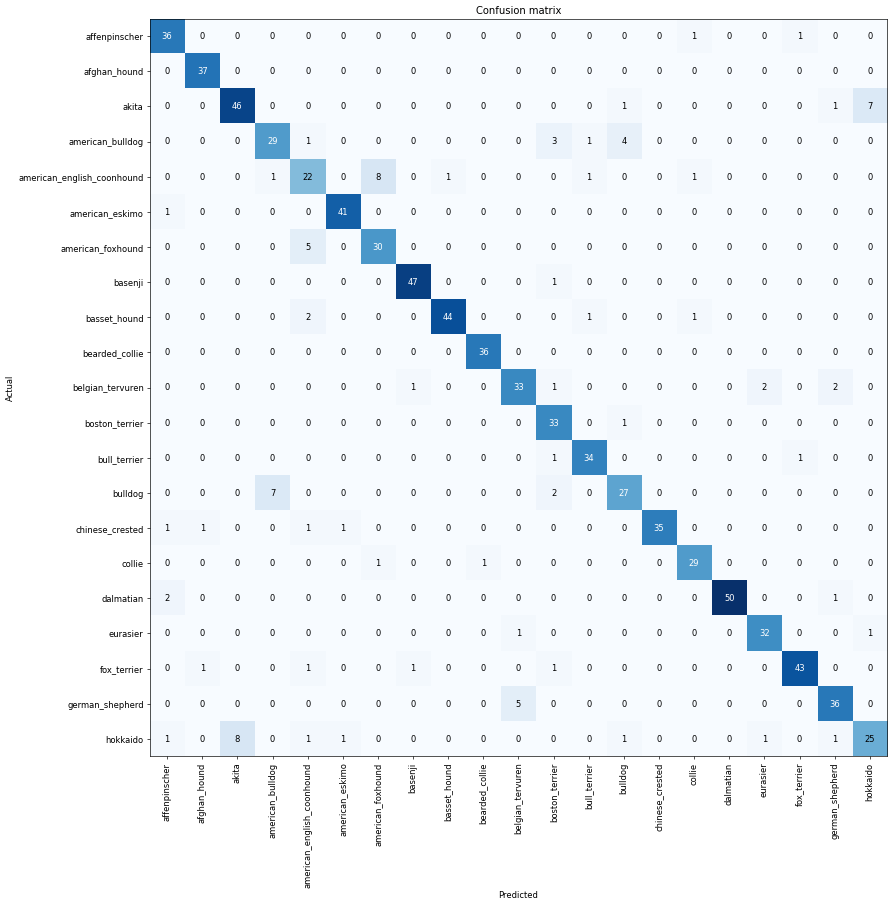

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('american_english_coonhound', 'american_foxhound', 8),
 ('hokkaido', 'akita', 8),
 ('akita', 'hokkaido', 7),
 ('bulldog', 'american_bulldog', 7),
 ('american_foxhound', 'american_english_coonhound', 5),
 ('german_shepherd', 'belgian_tervuren', 5),
 ('american_bulldog', 'bulldog', 4),
 ('american_bulldog', 'boston_terrier', 3),
 ('basset_hound', 'american_english_coonhound', 2),
 ('belgian_tervuren', 'eurasier', 2),
 ('belgian_tervuren', 'german_shepherd', 2),
 ('bulldog', 'boston_terrier', 2),
 ('dalmatian', 'affenpinscher', 2)]

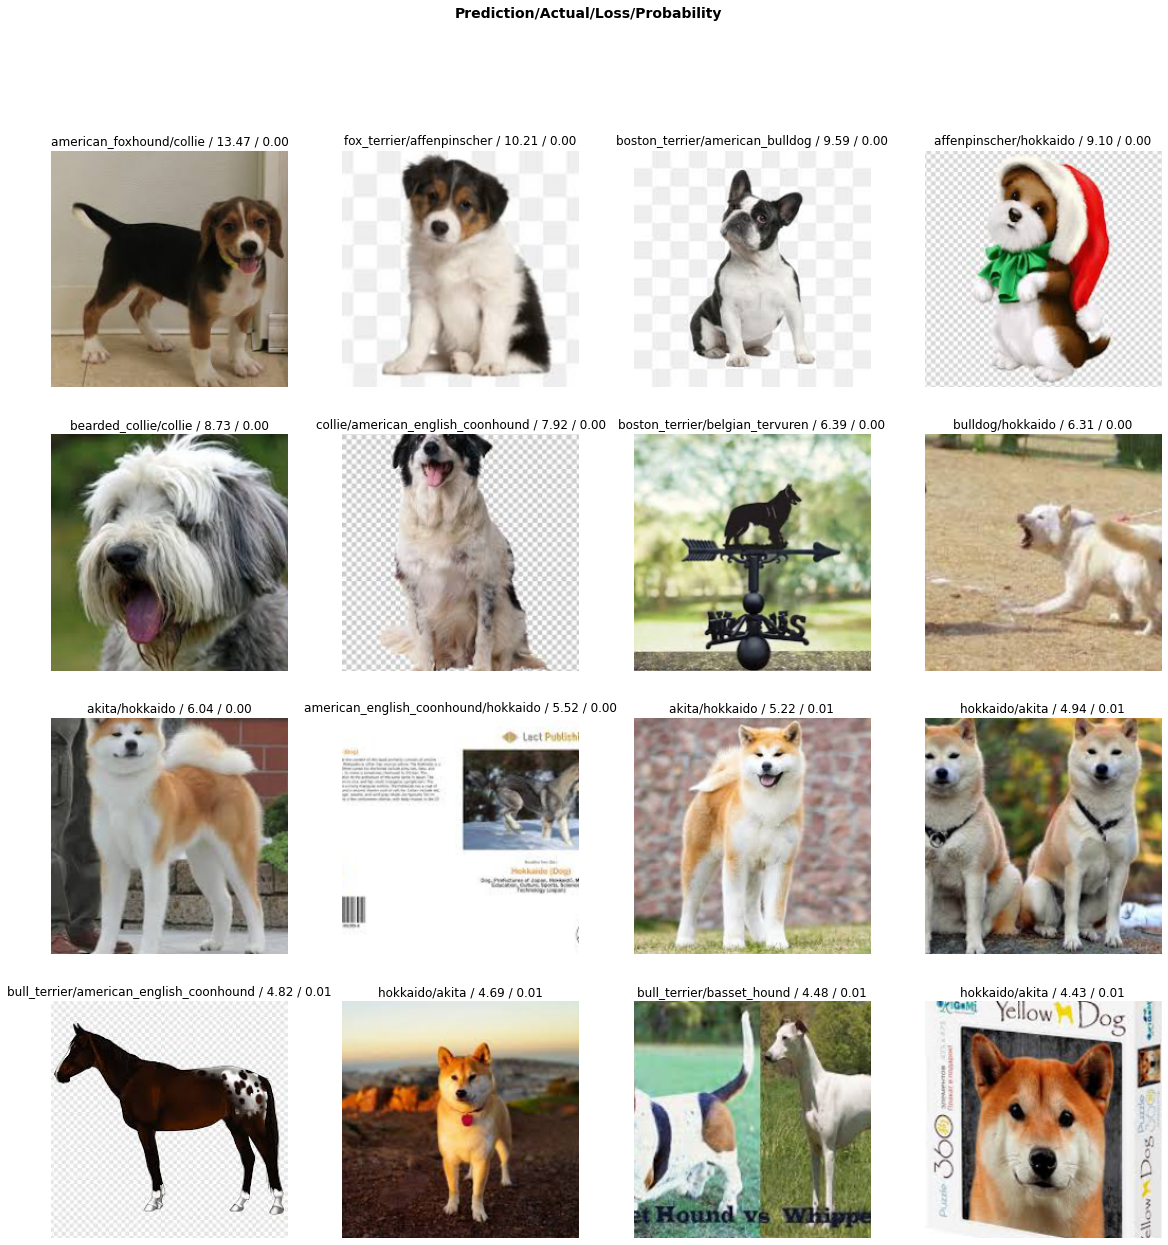

In [ ]:
interp.plot_top_losses(16, figsize=(20,20))

##Ручная очистка данных

Удалены картинки и рисунки.

##Обучение (resnet101)

In [ ]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224
                                  ).normalize(imagenet_stats)

In [ ]:
 len(data.train_ds),len(data.valid_ds)

(3100, 774)

In [ ]:
learn = cnn_learner(data, models.resnet101, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


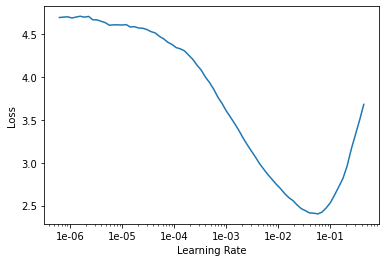

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.294156,0.593619,0.157623,01:24
1,0.753944,0.542191,0.147287,01:23
2,0.527424,0.411881,0.117571,01:23
3,0.393737,0.426751,0.127907,01:23
4,0.295949,0.396332,0.117571,01:23


In [ ]:
learn.save('dogs__resnet101_2')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-06,1e-045))

epoch,train_loss,valid_loss,error_rate,time
0,0.225290,0.399825,0.121447,01:50
1,0.245095,0.395640,0.118863,01:50


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('american_english_coonhound', 'american_foxhound', 10),
 ('hokkaido', 'akita', 9),
 ('belgian_tervuren', 'german_shepherd', 6),
 ('american_bulldog', 'bulldog', 5),
 ('bulldog', 'american_bulldog', 5),
 ('american_foxhound', 'american_english_coonhound', 4),
 ('akita', 'hokkaido', 3),
 ('affenpinscher', 'bearded_collie', 2),
 ('american_foxhound', 'basset_hound', 2),
 ('bearded_collie', 'collie', 2),
 ('bull_terrier', 'basenji', 2)]

##Расширение данных